In [2]:
# Open the text file for reading
with open("/Users/julianesler/Downloads/dv.txt", "r") as file:
    # Read the entire contents of the file
    file_contents = file.read()

# Now 'file_contents' contains the contents of the text file
#file_contents

In [3]:
import csv

# Specify the input and output file names
input_file = '/Users/julianesler/Downloads/dv.txt'
output_file = 'output.csv'

# Specify the delimiter used in the input file
delimiter = '\t'  # Change this to the actual delimiter used in your file

# Open the input file in text mode and the output file in CSV mode
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    # Create a CSV writer object
    csv_writer = csv.writer(outfile)

    # Read each line from the input file and write it to the CSV file
    for line in infile:
        # Use the correct delimiter to split the line into fields
        fields = line.strip().split(delimiter)
        
        # Write the fields to the CSV file
        csv_writer.writerow(fields)

# Open and print the contents of the output file
with open(output_file, 'r') as printed_file:
    content = printed_file.read()
    #print(content)

In [4]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'output.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now 'df' is a pandas DataFrame containing your CSV data
#df

In [5]:
df.rename(columns={'agency_cd': 'Agency'}, inplace=True)
df.rename(columns={'site_no': 'SiteID'}, inplace=True)
df.rename(columns={'datetime': 'Date'}, inplace=True)
df.rename(columns={'100139_00060_00003': 'Streamflow'}, inplace=True)
df.rename(columns={'100139_00060_00003_cd': 'Grade'}, inplace=True)
df

,Agency,SiteID,Date,Streamflow,Grade
0,USGS,9368000,1934-10-01,750.0,A
1,USGS,9368000,1934-10-02,700.0,A
2,USGS,9368000,1934-10-03,650.0,A
3,USGS,9368000,1934-10-04,600.0,A
4,USGS,9368000,1934-10-05,550.0,A
...,...,...,...,...,...
32551,USGS,9368000,2023-11-14,639.0,P
32552,USGS,9368000,2023-11-15,636.0,P
32553,USGS,9368000,2023-11-16,639.0,P
32554,USGS,9368000,2023-11-17,629.0,P


In [6]:
# to find the Probability of daily flow being less than or equal to the later defined "7Q10 low flow" flow value,
# we filtered the daily streamflow data by it being less than or equal to 85.5 cfs— the streamflow that defines low flow. 
# We then took the count of these occurances (164, because there are 164 rows in the dataframe) and divided by 32556, 
# the number of rows in the above data frame, representing the number of days for which we have data. 

filtered_df = df[df['Streamflow'] <= 85.5142857142857]
filtered_df

,Agency,SiteID,Date,Streamflow,Grade
1088,USGS,9368000,1937-09-23,84.0,A
1754,USGS,9368000,1939-07-21,44.0,A
1755,USGS,9368000,1939-07-22,39.0,A
1756,USGS,9368000,1939-07-23,33.0,A
1757,USGS,9368000,1939-07-24,42.0,A
...,...,...,...,...,...
15621,USGS,9368000,1977-07-08,83.0,A
15625,USGS,9368000,1977-07-12,83.0,A
15626,USGS,9368000,1977-07-13,80.0,A
15627,USGS,9368000,1977-07-14,77.0,A


In [7]:
df['Date'].str[:4]

0        1934
1        1934
2        1934
3        1934
4        1934
         ... 
32551    2023
32552    2023
32553    2023
32554    2023
32555    2023
Name: Date, Length: 32556, dtype: object

In [8]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
#df

In [9]:

# Sort DataFrame by date (if not sorted already)
df.sort_values(by='Date', inplace=True)

# Add a new column for the rolling 7-day average
df['7DayMean'] = df['Streamflow'].rolling(window=7).mean()

# Display the result
#df

In [10]:
import math
import numpy as np

#gdf stands for grouped daily flow or perhaps grouped data frame.
gdf = df.groupby('Year')['7DayMean'].agg(list).reset_index()

# Rename the columns if needed
gdf.columns = ['Year', '7DayMean']

ls = gdf.loc[0,'7DayMean']
ls1 = [Q for Q in ls if not math.isnan(Q)]
#print (ls1)
#printed ls1 to check that all the nan values were deleted and that no extra values were deleted.

# This replaces the first list in the gdf dataframe that had nan values with ls1, the cleaned list. 
gdf.at[0,'7DayMean'] = ls1
# Display the result
#gdf

In [11]:
# Find the minimum value for each list in the '7DayMean' column
gdf['AnnualMin'] = gdf['7DayMean'].apply(lambda x: min(x) if x else None)

# Display the result
gdf

,Year,7DayMean,AnnualMin
0,1934,"[600.0, 550.0, 507.14285714285717, 464.2857142...",195.714286
1,1935,"[479.14285714285717, 474.0, 474.0, 493.4285714...",380.285714
2,1936,"[624.0, 624.0, 605.1428571428571, 584.85714285...",312.000000
3,1937,"[683.5714285714286, 628.1428571428571, 584.142...",140.285714
4,1938,"[548.2857142857143, 552.1428571428571, 554.714...",254.714286
...,...,...,...
85,2019,"[501.2857142857143, 513.2857142857143, 521.571...",479.571429
86,2020,"[867.1428571428571, 847.2857142857143, 832.428...",282.428571
87,2021,"[492.14285714285717, 487.85714285714283, 480.8...",333.857143
88,2022,"[554.7142857142857, 533.7142857142857, 523.571...",349.142857


In [12]:
gdf['SortedAnnualMin'] = gdf['AnnualMin'].sort_values().tolist()
gdf

,Year,7DayMean,AnnualMin,SortedAnnualMin
0,1934,"[600.0, 550.0, 507.14285714285717, 464.2857142...",195.714286,12.714286
1,1935,"[479.14285714285717, 474.0, 474.0, 493.4285714...",380.285714,12.857143
2,1936,"[624.0, 624.0, 605.1428571428571, 584.85714285...",312.000000,16.714286
3,1937,"[683.5714285714286, 628.1428571428571, 584.142...",140.285714,52.285714
4,1938,"[548.2857142857143, 552.1428571428571, 554.714...",254.714286,65.857143
...,...,...,...,...
85,2019,"[501.2857142857143, 513.2857142857143, 521.571...",479.571429,873.714286
86,2020,"[867.1428571428571, 847.2857142857143, 832.428...",282.428571,933.571429
87,2021,"[492.14285714285717, 487.85714285714283, 480.8...",333.857143,973.857143
88,2022,"[554.7142857142857, 533.7142857142857, 523.571...",349.142857,1415.714286


In [13]:
#Finding a the rolling 7Q10 value
gdf['Rolling 7Q10'] = gdf['AnnualMin'].rolling(window=10).min()
gdf

,Year,7DayMean,AnnualMin,SortedAnnualMin,Rolling 7Q10
0,1934,"[600.0, 550.0, 507.14285714285717, 464.2857142...",195.714286,12.714286,NaN
1,1935,"[479.14285714285717, 474.0, 474.0, 493.4285714...",380.285714,12.857143,NaN
2,1936,"[624.0, 624.0, 605.1428571428571, 584.85714285...",312.000000,16.714286,NaN
3,1937,"[683.5714285714286, 628.1428571428571, 584.142...",140.285714,52.285714,NaN
4,1938,"[548.2857142857143, 552.1428571428571, 554.714...",254.714286,65.857143,NaN
...,...,...,...,...,...
85,2019,"[501.2857142857143, 513.2857142857143, 521.571...",479.571429,873.714286,391.714286
86,2020,"[867.1428571428571, 847.2857142857143, 832.428...",282.428571,933.571429,282.428571
87,2021,"[492.14285714285717, 487.85714285714283, 480.8...",333.857143,973.857143,282.428571
88,2022,"[554.7142857142857, 533.7142857142857, 523.571...",349.142857,1415.714286,282.428571


In [14]:
# to find the Probability of daily flow being less than or equal to the later defined "7Q10 low flow" flow value,
# we filtered the daily streamflow data by it being less than or equal to 85.5 cfs— the streamflow that defines low flow. 
# We then took the count of these occurances (164, because there are 164 rows in the dataframe) and divided by 32556, 
# the number of rows in the above data frame, representing the number of days for which we have data. 

filtered_gdf = gdf[gdf['AnnualMin'] <= 85.5142857142857]
filtered_gdf

,Year,7DayMean,AnnualMin,SortedAnnualMin,Rolling 7Q10
5,1939,"[564.1428571428571, 562.8571428571429, 565.714...",12.857143,68.571429,NaN
6,1940,"[423.7142857142857, 422.2857142857143, 439.714...",65.857143,76.142857,NaN
17,1951,"[418.0, 416.42857142857144, 421.7142857142857,...",52.285714,160.142857,52.285714
22,1956,"[619.0, 622.8571428571429, 626.7142857142857, ...",16.714286,207.571429,16.714286
25,1959,"[512.1428571428571, 479.2857142857143, 457.857...",12.714286,265.000000,12.714286
28,1962,"[541.4285714285714, 530.0, 522.8571428571429, ...",76.142857,285.142857,12.714286
29,1963,"[371.0, 387.2857142857143, 416.57142857142856,...",68.571429,285.571429,12.714286
38,1972,"[2135.714285714286, 2117.1428571428573, 2082.8...",81.285714,322.142857,68.571429
43,1977,"[1657.142857142857, 1672.857142857143, 1678.57...",83.714286,350.142857,81.285714


In [15]:
low_flow = gdf['SortedAnnualMin'].quantile(0.1)
print("7Q10 Low Flow (CF/S):", low_flow)

7Q10 Low Flow (CF/S): 85.5142857142857


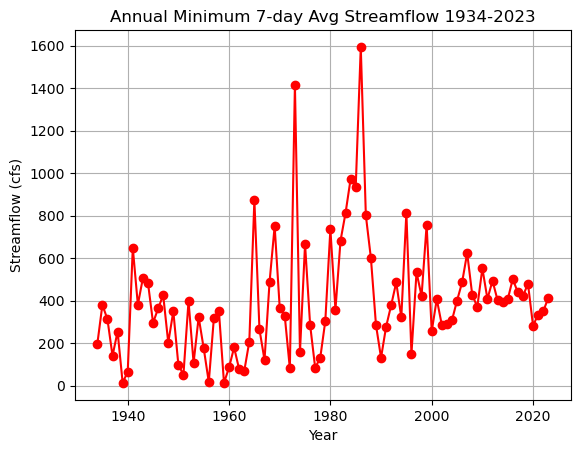

In [16]:
import matplotlib.pyplot as plt

# Plotting the Annual Minimum Streamflow values
plt.plot(gdf['Year'], gdf['AnnualMin'], marker='o', linestyle='-', color="red")
plt.title('Annual Minimum 7-day Avg Streamflow 1934-2023')
plt.xlabel('Year')
plt.ylabel('Streamflow (cfs)')
plt.grid(True)
plt.show()

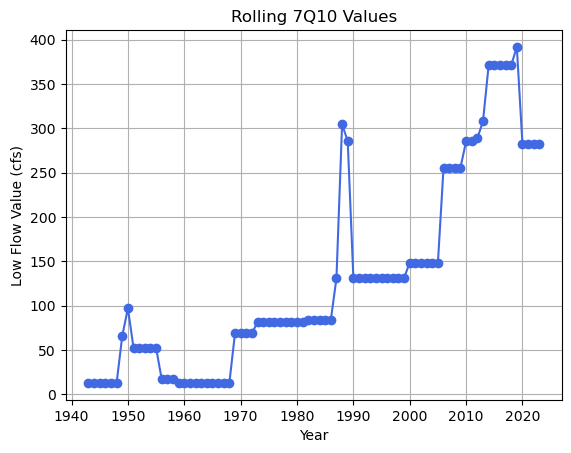

In [20]:
#Plotting the Rolling 7Q10 Values
# Plotting the Annual Minimum Streamflow values
plt.plot(gdf['Year'], gdf['Rolling 7Q10'], marker='o', linestyle='-', color="royalblue")
plt.title('Rolling 7Q10 Values')
plt.xlabel('Year')
plt.ylabel('Low Flow Value (cfs)')
#plt.ylim(0,1600)
plt.grid(True)
plt.show()

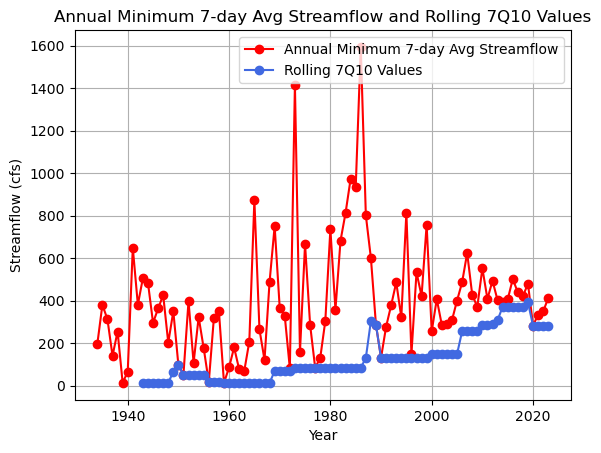

In [19]:
plt.plot(gdf['Year'], gdf['AnnualMin'], marker='o', linestyle='-', color="red", label='Annual Minimum 7-day Avg Streamflow')

# Kernel 2
plt.plot(gdf['Year'], gdf['Rolling 7Q10'], marker='o', linestyle='-', color="royalblue", label='Rolling 7Q10 Values')

# Common configurations
plt.title('Annual Minimum 7-day Avg Streamflow and Rolling 7Q10 Values')
plt.xlabel('Year')
plt.ylabel('Streamflow (cfs)')
plt.grid(True)

# Display legend
plt.legend()

# Show the plot
plt.show()